# Markowitz

**Descripción:**
Este código Python implementa un modelo de optimización financiera utilizando cálculo simbólico con la biblioteca SymPy. El modelo tiene como objetivo encontrar asignaciones de inversión óptimas (deltas) en diferentes activos (Z, S, C) para maximizar la utilidad de un inversor, considerando la aversión al riesgo y la dinámica del mercado.

**Parámetros:**
- Riqueza inicial (`x0`)
- Dinámica de Z (`z0`, `zd`, `zm`, `zu`)
- Dinámica de S (`s0`, `sd`, `sm`, `su`)
- Dinámica de C (`c0`, `cd`, `cm`, `cu`)
- Coeficiente de Aversión al Riesgo (`s`)
- Probabilidades (`pu`, `pm`, `pd`)

**Mejoramiento:**
El código establece y resuelve un sistema de ecuaciones que representan la consistencia de la riqueza del inversor y las condiciones de equilibrio de los precios de los activos. Utiliza el método de Newton para sistemas no lineales (`nsolve` de SymPy) para encontrar los deltas óptimos (`dz`, `ds`, `dc`) que maximizan la utilidad del inversor.

**Resultados adicionales:**
El código calcula resultados adicionales basados en el equilibrio, como covarianza, probabilidades, identificación de eventos catastróficos y gammas para cada activo. Luego, los resultados se imprimen en la consola.

**Nota:**
- Este código utiliza cálculo simbólico para resolver el problema de optimización.
- La notación `\u03C3` representa la letra griega sigma.
- El código utiliza el atributo `Style.BRIGHT` para resaltar los valores de salida en la consola.

In [1]:
import numpy as np
import math
from scipy.optimize import minimize
from colorama import Fore, Back, Style
from math import sqrt
import matplotlib.pyplot as plt

## Calculadora de Frontera de Markowitz 



El multiplicador λr es:[-0.02212183]
El multiplicador λ1 es:[-0.00592415]


El gasto total de Markowitz es: 0.8463
En el portafolio de Markowitz, el valor óptimo de γ1 es: [1.423]
En el portafolio de Markowitz, el valor óptimo de γ2 es: [-0.954]
En el portafolio de Markowitz, el valor óptimo de γ3 es: [0.019]
En el portafolio de Markowitz, el valor óptimo de γ4 es: [0.593]
En el portafolio de Markowitz, el valor óptimo de γ5 es: [-0.235]
La varianza mínima es: 0.1401%


El gasto total de Tobin es: 1.0
En el portafolio de Tobin, el valor óptimo de γ1 es: [1.065]
En el portafolio de Tobin, el valor óptimo de γ2 es: [-1.79]
En el portafolio de Tobin, el valor óptimo de γ3 es: [-0.004]
En el portafolio de Tobin, el valor óptimo de γ4 es: [1.32]
En el portafolio de Tobin, el valor óptimo de γ5 es: [0.409]
La varianza mínima es: 0.1852%


El gasto total de MGV es: 1.0
En el portafolio de MGV, el valor óptimo de γ1 es: [1.433]
En el portafolio de MGV, el valor óptimo de γ2 es: [-1.394]
En e

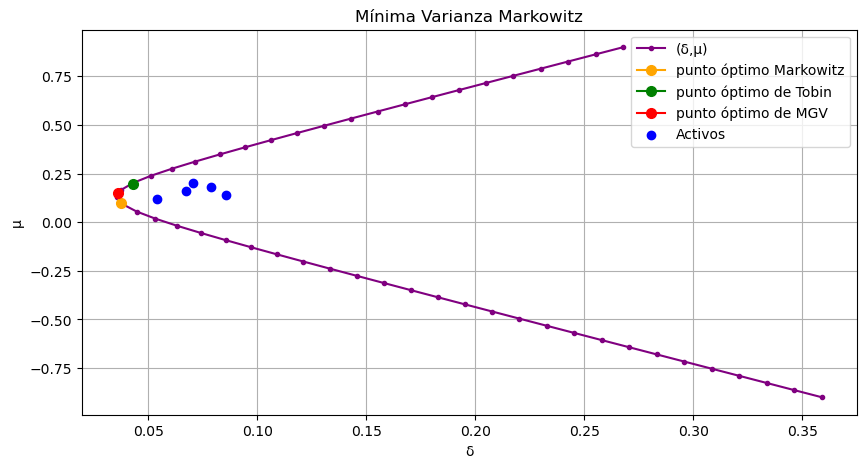

In [2]:
miu = [0.12,
0.14,
0.16,
0.18,
0.2]

var = [0.0029,.004,.022,.0026,.0027,
       .004,.0073,.0047,.006,.0041,
       .0022,.0047,.0045,.0049,.0019,
       .0026,.006,.0049,.0062,.0033,
       .0027,.0041,.0019,.0033,.005]

r = 0.1
sigma = np.array(var).reshape(len(miu), len(miu))
mu = np.array(miu).reshape(sigma.shape[0],1)
ones = np.ones((sigma.shape[0], 1))

#Incógnitas
a = 1/2 * np.dot(np.dot(mu.T, np.linalg.inv(sigma)),mu)
b = 1/2 * np.dot(np.dot(mu.T,np.linalg.inv(sigma)),ones)
c = 1/2 * np.dot(np.dot(ones.T,np.linalg.inv(sigma)),ones)

#Multiplicadores
lambdar = (-c*r + b) / (b**2 -a*c) 
lambda1 =(-b*r +a) / (b**2 -a*c)

#Vectores gamma
gammaM = 1/(2*(b**2 -a*c)) * np.dot(np.linalg.inv(sigma),(b*mu - a*ones)) + 1/(2*(b**2 -a*c))*np.dot(np.linalg.inv(sigma),(b*ones - c*mu))*r
gammaT = np.dot(np.linalg.inv(sigma),(mu - r * ones)) / np.dot(ones.T,np.dot(np.linalg.inv(sigma),(mu - r*ones)))
gammaG = np.dot(np.dot(np.linalg.inv(sigma),ones),np.linalg.inv(np.dot(np.dot(ones.T,np.linalg.inv(sigma)),ones)))

print("\n")
print(f"El {Style.BRIGHT}multiplicador \u03BBr{Style.RESET_ALL} es:{lambdar[0]}")
print(f"El {Style.BRIGHT}multiplicador \u03BB1{Style.RESET_ALL} es:{lambda1[0]}")
print("\n")

#Markowitz

print(f"{Fore.BLACK}El{Style.BRIGHT} gasto total{Style.RESET_ALL} de {Style.BRIGHT}Markowitz{Style.RESET_ALL} es: {Style.BRIGHT}{Fore.GREEN}{round(np.sum(gammaM),4)}{Style.RESET_ALL}")
for i in range(len(miu)):
    print(f"En el portafolio de {Style.BRIGHT}Markowitz{Style.RESET_ALL}, el valor óptimo de {Style.BRIGHT}\u03B3{i+1}{Style.RESET_ALL} es: {Fore.RED}{Style.BRIGHT}{np.round(gammaM[i],3)}{Style.RESET_ALL}")
print(f"La {Style.BRIGHT}varianza mínima{Style.RESET_ALL} es: {Style.BRIGHT}{Fore.RED}{(np.dot(np.dot(gammaM.T,sigma),gammaM)[0,0] * 100):.4f}%{Style.RESET_ALL}")
print("\n")

#Tobin

print(f"{Fore.BLACK}El {Style.BRIGHT}gasto total{Style.RESET_ALL} de {Style.BRIGHT}Tobin{Style.RESET_ALL} es: {Style.BRIGHT}{Fore.GREEN}{round(np.sum(gammaT),4)}{Style.RESET_ALL}")
for i in range(len(miu)):
    print(f"En el portafolio de {Style.BRIGHT}Tobin{Style.RESET_ALL}, el valor óptimo de {Style.BRIGHT}\u03B3{i+1}{Style.RESET_ALL} es: {Fore.RED}{Style.BRIGHT}{np.round(gammaT[i],3)}{Style.RESET_ALL}")
print(f"La {Style.BRIGHT}{Style.BRIGHT}varianza mínima{Style.RESET_ALL} es: {Style.BRIGHT}{Fore.RED}{(np.dot(np.dot(gammaT.T,sigma),gammaT)[0,0] * 100):.4f}%{Style.RESET_ALL}")
print("\n")

#MGV

print(f"{Fore.BLACK}{Style.BRIGHT}El gasto total{Style.RESET_ALL} de {Style.BRIGHT}MGV {Style.RESET_ALL}es: {Style.BRIGHT}{Fore.GREEN}{round(np.sum(gammaG),4)}{Style.RESET_ALL}")
for i in range(len(miu)):
    print(f"En el portafolio de {Style.BRIGHT}MGV{Style.RESET_ALL}, el valor óptimo de {Style.BRIGHT}\u03B3{i+1}{Style.RESET_ALL} es: {Fore.RED}{Style.BRIGHT}{np.round(gammaG[i],3)}{Style.RESET_ALL}")
print(f"La {Style.BRIGHT}varianza mínima{Style.RESET_ALL} es: {Style.BRIGHT}{Fore.RED}{(np.dot(np.dot(gammaG.T,sigma),gammaG)[0,0] * 100):.4f}%{Style.RESET_ALL}")

rlist = np.linspace(-.9, .9, 50)
s = []
for ri in rlist:
    #Multiplicadores
    lambdar = (-c*ri + b) / (b**2 -a*c) 
    lambda1 =(-b*ri +a) / (b**2 -a*c)

    #Vector gamma
    gam = 1/(2*(b**2 -a*c)) * np.dot(np.linalg.inv(sigma),(b*mu - a*ones)) + 1/(2*(b**2 -a*c))*np.dot(np.linalg.inv(sigma),(b*ones - c*mu))*ri
    s.append(np.sqrt(np.dot(np.dot(gam.T,sigma),gam)[0]))
        
  




#Frontera
plt.figure(figsize=(10, 5))
plt.plot(s,rlist, label='(\u03B4,\u03BC)',color = "purple", marker='.', linestyle='-') 

#portafolio óptimo de Markowitz
sM = sqrt(np.dot(np.dot(gammaM.T,sigma),gammaM))
plt.plot(sM,np.dot(miu,gammaM),label='punto óptimo Markowitz',color = "orange", marker='o',markersize = 7)

#portafolio óptimo de Tobin
sT = sqrt(np.dot(np.dot(gammaT.T,sigma),gammaT))
plt.plot(sT,np.dot(miu,gammaT),label='punto óptimo de Tobin',color = "green", marker='o', markersize = 7)


#portafolio óptimo de MGV
sG = sqrt(np.dot(np.dot(gammaG.T,sigma),gammaG))
plt.plot(sG,np.dot(miu,gammaG),label='punto óptimo de MGV',color = "red", marker='o', markersize = 7)




#Activos iniciales
s_points = np.sqrt(np.diag(sigma))
m_points = miu 
plt.scatter(s_points, m_points, color='blue', marker='o', label='Activos')  

#Gráfica
plt.xlabel('\u03B4')
plt.ylabel('\u03BC')
plt.legend()
plt.grid(True)
plt.title('Mínima Varianza Markowitz')
plt.show()

In [30]:
np.dot(miu, gammaT)[0]

0.1959581587276453

In [33]:
sT,np.dot(miu,gammaT)

(0.043033949423545145, array([0.19595816]))

## Optimización de la Frontera (<=)

Los Eigenvalores son:
[0.01935206 0.00810634 0.00012721 0.00031439]


Resultado de la optimización:
El gasto total es: 1.0
El valor esperado del portafolio es: 10.0% mientras que el r_min era 10.0%


El valor óptimo de γ1 es: 0.2481
El valor óptimo de γ2 es: 0.5355
El valor óptimo de γ3 es: 0.3374
El valor óptimo de γ4 es: -0.1211


El valor de varianza mínima es: 0.0139%
El valor de desviación estandar mínimo es: 1.1788%


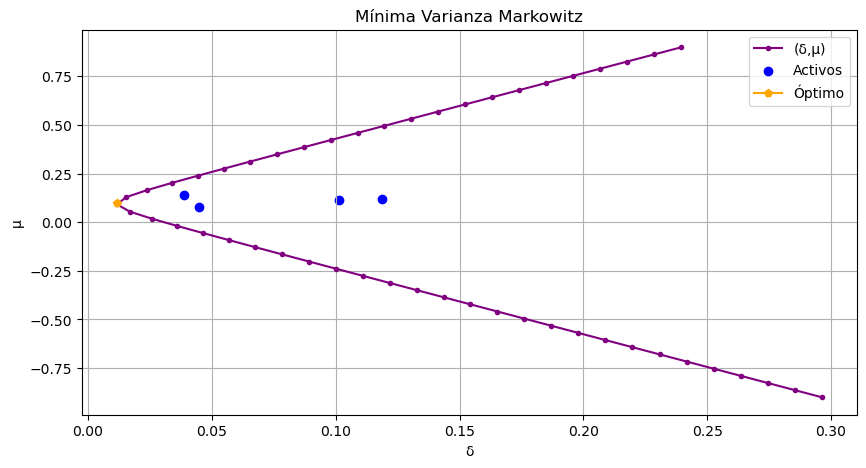

In [3]:
#Parámetros

miu = [0.1389,
0.0783,
0.1134,
0.1211]

var = [0.0015, 0.0011, -0.0016, 0.0022,
0.0011, 0.002, -0.0041, -0.0014,
-0.0016, -0.0041, 0.0103, 0.0061,
0.0022, -0.0014, 0.0061, 0.0141]
rmin = 0.1

sigma = np.array(var).reshape(len(miu), len(miu))
mu = np.array(miu).reshape(sigma.shape[0],1)
ones = np.ones((sigma.shape[0], 1))

# Hallar los eigenvectores
eigenvalues, eigenvectors = np.linalg.eig(sigma)

# Definir la función que quieres minimizar
def minVar(gamma):
    return np.dot(np.dot(gamma.T,sigma), gamma)

# Definir las restricciones
def c1(gamma):
    return np.dot(mu.T, gamma) - rmin

def c2(gamma):
    return 1 - np.dot(ones.T, gamma) 

# Valores iniciales para las variables a minimizar
gamma = np.array([0.20,0.20,0.20,0.20])

# Especificar las restricciones como diccionario
constraints = ({'type': 'eq', 'fun': c1},
               {'type': 'eq', 'fun': c2})

# Realizar la optimización
result = minimize(minVar, gamma, constraints=constraints, method='SLSQP')

# Mostrar el resultado
print(f"Los {Style.BRIGHT}Eigenvalores{Style.RESET_ALL} son:")
print(eigenvalues)
print("\n")
print(f"{Style.BRIGHT}{Fore.BLACK}Resultado de la optimización:{Style.RESET_ALL}")
print(f"{Fore.BLACK}El gasto total es: {Style.BRIGHT}{Fore.GREEN}{round(sum(result.x),4)}{Style.RESET_ALL}")
print(f"El valor esperado del portafolio es: {Style.BRIGHT}{Fore.GREEN}{round(list(np.dot(result.x,mu))[0]*100,3)}%{Style.RESET_ALL} mientras que el r_min era {Style.BRIGHT}{Fore.GREEN}{rmin*100}%{Style.RESET_ALL}")
print("\n")
for i in range(len(miu)):
    print(f"El valor óptimo de {Style.BRIGHT}\u03B3{i+1}{Style.RESET_ALL} es: {Fore.RED}{Style.BRIGHT}{round(result.x[i],4)}{Style.RESET_ALL}")
print("\n")
print(f"El valor de varianza mínima es: {Style.BRIGHT}{Fore.RED}{round(result.fun*100,4)}%{Style.RESET_ALL}")
print(f"El valor de desviación estandar mínimo es: {Style.BRIGHT}{Fore.RED}{round(math.sqrt(result.fun)*100,4)}%{Style.RESET_ALL}")

# Create lists to store results
m = [];
s= []; 

# Gráfica del punto óptimo
x = math.sqrt(result.fun)
y = np.dot(result.x,mu)

# Define a range of rmin values
rmin_range = np.linspace(-.9, .9, 50)
#bounds = [(0, 1)] * len(gamma)
# Perform optimization for each rmin value
for rmin in rmin_range:
    constraints = ({'type': 'eq', 'fun': c1}, 
                   {'type': 'eq', 'fun': c2})
    
    #Optimización A (sin restricción de gammas)
    result = minimize(minVar, gamma, constraints=constraints, method='SLSQP')
    s.append(sqrt(result.fun))
    m.append(np.dot(mu.T, result.x)[0])

# Puntos de gráfica
s_points = np.sqrt(np.diag(sigma))  
m_points = miu   



# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(s,m, label='(\u03B4,\u03BC)',color = "purple", marker='.', linestyle='-')
plt.scatter(s_points, m_points, color='blue', marker='o', label='Activos')  # Add additional points
plt.plot(x, y, color='orange', marker='p', label='Óptimo')  # Add additional points
#plt.plot(#sigma ,#mu , 'r+', markersize=10) #portafolio óptimo
plt.xlabel('\u03B4')
plt.ylabel('\u03BC')
plt.legend()
plt.grid(True)
plt.title('Mínima Varianza Markowitz')
plt.show()

## Hallar los valores de rho para los cuales no está bien definida la matriz de covarianzas

In [10]:
import numpy as np

# Parámetros
miu = [0.1, 0.11, 0.09, 0.08, 0.12, 0.15]

var = [
    [1, 0.002, 0, -0.0016, 0.0013, 0],
    [0.002, 0.01, 0.0018, 0, 0.0039, 0],
    [0, 0.0018, 0.0081, 0, 0.00468, 0],
    [-0.0016, 0, 0, 0.0064, 0.0052, 0],
    [0.0013, 0.0039, 0.00468, 0.0052, 0.0169, 0.013],
    [0, 0, 0, 0, 0.013, 0.04]]

rmin = 0.1
sigma = np.array(var).reshape(len(miu), len(miu))
mu = np.array(miu).reshape(sigma.shape[0], 1)
ones = np.ones((sigma.shape[0], 1))

rholist = np.linspace(-1, 1, 100)
negative_rho_list = []

for rho in rholist:
    var = [
    [1, 0.002, 0, -0.0016, 0.0013, 0],
    [0.002, 0.01, 0.0018, 0, 0.0039, 0],
    [0, 0.0018, 0.0081, 0, 0.00468, 0],
    [-0.0016, 0, 0, 0.0064, 0.0052, 0],
    [0.0013, 0.0039, 0.00468, 0.0052, 0.0169, 0.026*rho],
    [0, 0, 0, 0, 0.026*rho, 0.04]]
    
    sigma = np.array(var).reshape(len(miu), len(miu))  # Update sigma for each rho
    
    eigenvalues, _ = np.linalg.eig(sigma)
    # Check if any eigenvalue is negative
    if any(eigenvalues < 0):
        negative_rho_list.append(rho)

print(f"{Style.BRIGHT}Valores de \u03C1 con eigenvalores negativos{Style.RESET_ALL}:", negative_rho_list)

Valores de ρ con eigenvalores negativos: [-1.0, -0.9797979797979798, -0.9595959595959596, -0.9393939393939394, -0.9191919191919192, -0.898989898989899, -0.8787878787878788, -0.8585858585858586, -0.8383838383838383, -0.8181818181818181, -0.797979797979798, -0.7777777777777778, -0.7575757575757576, -0.7373737373737373, 0.7373737373737375, 0.7575757575757578, 0.7777777777777779, 0.7979797979797982, 0.8181818181818183, 0.8383838383838385, 0.8585858585858588, 0.8787878787878789, 0.8989898989898992, 0.9191919191919193, 0.9393939393939394, 0.9595959595959598, 0.9797979797979799, 1.0]
